#Question 2

#DNN on MNIST data

Notebook Link: 

https://colab.research.google.com/drive/1JmpVUkxWvpeqwkLCUnSw8I4SOHgvQ4jC?usp=sharing

### Import Libraries

In [0]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import numpy as np     
import keras
np.random.seed(0)  #for reproducibility            

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt


Using TensorFlow backend.


### Load, normalize & split the data

In [0]:
 (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
###2.Preprocess
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)

X_train,X_valid = X_train[10000:],X_train[:10000]
Y_train,Y_valid = Y_train[10000:],Y_train[:10000]

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


##DNN model

#### Build DNN Model

In [0]:
###3. Set up parameters

def build_model():
  input_size = 784
  hidden_neurons = 512    
  
  ###4.Build the model
  model = Sequential()    

  #Layer 1
  model.add(Dense(512, input_dim=input_size)) 
  model.add(Activation('relu')) 

  #Layer 2
  model.add(Dense(256)) 
  model.add(Activation('relu')) 

  #Layer 3
  model.add(Dense(128)) 
  model.add(Activation('relu')) 

  model.add(Dense(classes, input_dim=hidden_neurons)) 
  model.add(Activation('softmax'))
  return model

 

 


###  Train DNN model

Optmizer =SGD
Epochs=15

Loss Fucntion= categorical_crossentropy

momentum=0.1


In [0]:
def build_train_model(batch_size,learning_rate,x_train,y_train,x_valid,y_valid,momentum):

  model=build_model()
  opt = keras.optimizers.SGD(learning_rate=learning_rate,momentum=momentum)
  model.compile(optimizer = opt, loss ='categorical_crossentropy',metrics=['accuracy'])
  print('compiled!')
  # start training
  history = model.fit(x_train,y_train,batch_size=batch_size, epochs = 15,
            validation_data=(x_valid,y_valid),
            verbose=2, shuffle=True)
  return model, history

#### Without momentum

momentum=0.0

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 0.6140 - accuracy: 0.8366 - val_loss: 0.2962 - val_accuracy: 0.9175
Epoch 2/15
 - 10s - loss: 0.2589 - accuracy: 0.9262 - val_loss: 0.2282 - val_accuracy: 0.9365
Epoch 3/15
 - 10s - loss: 0.2043 - accuracy: 0.9413 - val_loss: 0.1884 - val_accuracy: 0.9445
Epoch 4/15
 - 9s - loss: 0.1678 - accuracy: 0.9511 - val_loss: 0.1697 - val_accuracy: 0.9515
Epoch 5/15
 - 9s - loss: 0.1426 - accuracy: 0.9590 - val_loss: 0.1484 - val_accuracy: 0.9582
Epoch 6/15
 - 9s - loss: 0.1227 - accuracy: 0.9644 - val_loss: 0.1349 - val_accuracy: 0.9609
Epoch 7/15
 - 9s - loss: 0.1068 - accuracy: 0.9688 - val_loss: 0.1251 - val_accuracy: 0.9636
Epoch 8/15
 - 9s - loss: 0.0936 - accuracy: 0.9732 - val_loss: 0.1161 - val_accuracy: 0.9666
Epoch 9/15
 - 9s - loss: 0.0823 - accuracy: 0.9764 - val_loss: 0.1066 - val_accuracy: 0.9689
Epoch 10/15
 - 10s - loss: 0.0733 - accuracy: 0.9787 - val_loss: 0.0992 - val_accuracy: 0.9720
Epoch 

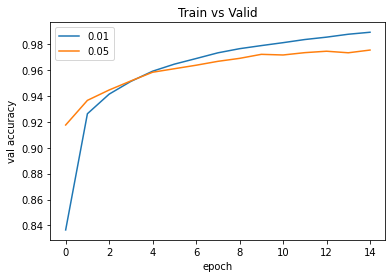

In [0]:
learning_rate=0.01
batch_size=32
momentum=0.0
model_1,history=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

###5.Test 
score = model_1.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 
  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Train vs Valid')  
plt.ylabel('val accuracy')  
plt.xlabel('epoch')  
plt.legend(['0.01', '0.05'], loc='upper left') 

#### With momentum

momentum=0.9

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 10s - loss: 0.2689 - accuracy: 0.9196 - val_loss: 0.1524 - val_accuracy: 0.9542
Epoch 2/15
 - 9s - loss: 0.1019 - accuracy: 0.9687 - val_loss: 0.0957 - val_accuracy: 0.9720
Epoch 3/15
 - 10s - loss: 0.0664 - accuracy: 0.9789 - val_loss: 0.0940 - val_accuracy: 0.9720
Epoch 4/15
 - 9s - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0909 - val_accuracy: 0.9728
Epoch 5/15
 - 10s - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 6/15
 - 10s - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0816 - val_accuracy: 0.9770
Epoch 7/15
 - 10s - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0863 - val_accuracy: 0.9766
Epoch 8/15
 - 10s - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0918 - val_accuracy: 0.9767
Epoch 9/15
 - 10s - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0813 - val_accuracy: 0.9821
Epoch 10/15
 - 10s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0763 - val_accuracy: 0.9821
E

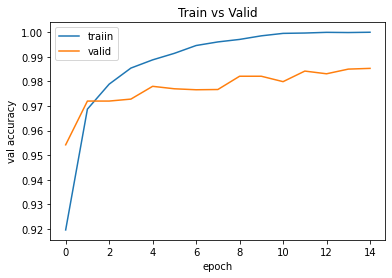

In [0]:
learning_rate=0.01
batch_size=32
momentum=0.9
model_2,history=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

###5.Test 
score = model_2.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 
  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Train vs Valid')  
plt.ylabel('val accuracy')  
plt.xlabel('epoch')  
plt.legend(['traiin', 'valid'], loc='upper left') 
 

With momentum, model converges fast hence test accuracy is higher 

###Question-2:  Part-1: 

Impact of learning rates on model training

Different learning rates =  0.001, 0.01, 0.05, 0.1

In [0]:
learning_rate=0.001
batch_size=32
momentum=0.0
model1,history1=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

score = model1.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 10s - loss: 1.8571 - accuracy: 0.5603 - val_loss: 1.2977 - val_accuracy: 0.7563
Epoch 2/15
 - 10s - loss: 0.9247 - accuracy: 0.8095 - val_loss: 0.6687 - val_accuracy: 0.8461
Epoch 3/15
 - 10s - loss: 0.5735 - accuracy: 0.8589 - val_loss: 0.4930 - val_accuracy: 0.8750
Epoch 4/15
 - 10s - loss: 0.4564 - accuracy: 0.8799 - val_loss: 0.4174 - val_accuracy: 0.8890
Epoch 5/15
 - 10s - loss: 0.3983 - accuracy: 0.8918 - val_loss: 0.3745 - val_accuracy: 0.8988
Epoch 6/15
 - 10s - loss: 0.3626 - accuracy: 0.8991 - val_loss: 0.3461 - val_accuracy: 0.9041
Epoch 7/15
 - 10s - loss: 0.3378 - accuracy: 0.9056 - val_loss: 0.3248 - val_accuracy: 0.9100
Epoch 8/15
 - 10s - loss: 0.3189 - accuracy: 0.9094 - val_loss: 0.3095 - val_accuracy: 0.9137
Epoch 9/15
 - 10s - loss: 0.3036 - accuracy: 0.9133 - val_loss: 0.2956 - val_accuracy: 0.9159
Epoch 10/15
 - 10s - loss: 0.2907 - accuracy: 0.9170 - val_loss: 0.2856 - val_accuracy: 0.9196

In [0]:
learning_rate=0.01
batch_size=32
momentum=0.0
model2,history2=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

score = model2.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 10s - loss: 0.5919 - accuracy: 0.8470 - val_loss: 0.2914 - val_accuracy: 0.9198
Epoch 2/15
 - 10s - loss: 0.2563 - accuracy: 0.9266 - val_loss: 0.2201 - val_accuracy: 0.9392
Epoch 3/15
 - 10s - loss: 0.1993 - accuracy: 0.9431 - val_loss: 0.1804 - val_accuracy: 0.9486
Epoch 4/15
 - 10s - loss: 0.1629 - accuracy: 0.9530 - val_loss: 0.1581 - val_accuracy: 0.9544
Epoch 5/15
 - 10s - loss: 0.1368 - accuracy: 0.9604 - val_loss: 0.1496 - val_accuracy: 0.9579
Epoch 6/15
 - 10s - loss: 0.1175 - accuracy: 0.9659 - val_loss: 0.1296 - val_accuracy: 0.9627
Epoch 7/15
 - 10s - loss: 0.1024 - accuracy: 0.9704 - val_loss: 0.1215 - val_accuracy: 0.9650
Epoch 8/15
 - 10s - loss: 0.0899 - accuracy: 0.9741 - val_loss: 0.1128 - val_accuracy: 0.9683
Epoch 9/15
 - 10s - loss: 0.0795 - accuracy: 0.9775 - val_loss: 0.1104 - val_accuracy: 0.9679
Epoch 10/15
 - 10s - loss: 0.0710 - accuracy: 0.9796 - val_loss: 0.1016 - val_accuracy: 0.9698

In [0]:
learning_rate=0.05
batch_size=32
momentum=0.0
model3,history3=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

score = model3.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 0.3220 - accuracy: 0.9057 - val_loss: 0.1598 - val_accuracy: 0.9533
Epoch 2/15
 - 9s - loss: 0.1267 - accuracy: 0.9619 - val_loss: 0.1241 - val_accuracy: 0.9629
Epoch 3/15
 - 9s - loss: 0.0850 - accuracy: 0.9744 - val_loss: 0.0886 - val_accuracy: 0.9729
Epoch 4/15
 - 9s - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.1632 - val_accuracy: 0.9468
Epoch 5/15
 - 9s - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0826 - val_accuracy: 0.9745
Epoch 6/15
 - 10s - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0814 - val_accuracy: 0.9766
Epoch 7/15
 - 10s - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0753 - val_accuracy: 0.9775
Epoch 8/15
 - 9s - loss: 0.0160 - accuracy: 0.9959 - val_loss: 0.0917 - val_accuracy: 0.9746
Epoch 9/15
 - 9s - loss: 0.0113 - accuracy: 0.9973 - val_loss: 0.0696 - val_accuracy: 0.9807
Epoch 10/15
 - 10s - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 

In [0]:
learning_rate=0.1
batch_size=32
momentum=0.0
model4,history4=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

score = model4.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 0.2607 - accuracy: 0.9188 - val_loss: 0.1257 - val_accuracy: 0.9613
Epoch 2/15
 - 9s - loss: 0.1008 - accuracy: 0.9688 - val_loss: 0.0992 - val_accuracy: 0.9704
Epoch 3/15
 - 9s - loss: 0.0664 - accuracy: 0.9788 - val_loss: 0.0777 - val_accuracy: 0.9765
Epoch 4/15
 - 9s - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 5/15
 - 9s - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0852 - val_accuracy: 0.9749
Epoch 6/15
 - 9s - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.1137 - val_accuracy: 0.9677
Epoch 7/15
 - 9s - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0871 - val_accuracy: 0.9783
Epoch 8/15
 - 9s - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0840 - val_accuracy: 0.9799
Epoch 9/15
 - 9s - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0798 - val_accuracy: 0.9813
Epoch 10/15
 - 9s - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0774 - val_accuracy: 0.9827
Epoch 11/


Test accuracy with learning rate 0.001: 0.9323999881744385

Test accuracy with learning rate 0.01: 0.9735000133514404

Test accuracy with learning rate 0.05: 0.9817000031471252

Test accuracy with learning rate 0.1: 0.9822999835014343


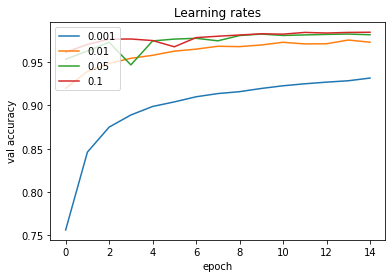

In [0]:

score = model1.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with learning rate 0.001:', score[1]) 

score = model2.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with learning rate 0.01:', score[1]) 

score = model3.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with learning rate 0.05:', score[1]) 

score = model4.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with learning rate 0.1:', score[1]) 


plt.plot(history1.history['val_accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.plot(history3.history['val_accuracy'])  
plt.plot(history4.history['val_accuracy']) 

plt.title('Learning rates')  
plt.ylabel('val accuracy')  
plt.xlabel('epoch')  
plt.legend(['0.001', '0.01','0.05','0.1'], loc='upper left') 

 Test Accuracy  and valid accuracy increase with increase in learning rate

###Question-2:  Part-2: 

Impact of batch sizes on model training

Different learning rates =  1, 32, 256, 1024

In [0]:
batch_size=1

learning_rate=0.01
momentum=0.0
model1,history1=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 137s - loss: 0.2309 - accuracy: 0.9293 - val_loss: 0.1066 - val_accuracy: 0.9675
Epoch 2/15
 - 137s - loss: 0.1045 - accuracy: 0.9678 - val_loss: 0.1101 - val_accuracy: 0.9682
Epoch 3/15
 - 137s - loss: 0.0693 - accuracy: 0.9786 - val_loss: 0.1047 - val_accuracy: 0.9705
Epoch 4/15
 - 137s - loss: 0.0544 - accuracy: 0.9827 - val_loss: 0.0921 - val_accuracy: 0.9754
Epoch 5/15
 - 137s - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0939 - val_accuracy: 0.9780
Epoch 6/15
 - 137s - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0792 - val_accuracy: 0.9826
Epoch 7/15
 - 138s - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0853 - val_accuracy: 0.9802
Epoch 8/15
 - 138s - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0832 - val_accuracy: 0.9800
Epoch 9/15
 - 139s - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.1053 - val_accuracy: 0.9761
Epoch 10/15
 - 138s - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0939 - val_accura

In [0]:
batch_size=32

learning_rate=0.01
momentum=0.0
model2,history2=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 9s - loss: 0.6020 - accuracy: 0.8423 - val_loss: 0.2891 - val_accuracy: 0.9189
Epoch 2/15
 - 9s - loss: 0.2601 - accuracy: 0.9254 - val_loss: 0.2265 - val_accuracy: 0.9360
Epoch 3/15
 - 9s - loss: 0.2043 - accuracy: 0.9413 - val_loss: 0.1889 - val_accuracy: 0.9450
Epoch 4/15
 - 9s - loss: 0.1697 - accuracy: 0.9512 - val_loss: 0.1600 - val_accuracy: 0.9536
Epoch 5/15
 - 9s - loss: 0.1444 - accuracy: 0.9584 - val_loss: 0.1464 - val_accuracy: 0.9595
Epoch 6/15
 - 9s - loss: 0.1247 - accuracy: 0.9641 - val_loss: 0.1357 - val_accuracy: 0.9615
Epoch 7/15
 - 9s - loss: 0.1089 - accuracy: 0.9690 - val_loss: 0.1223 - val_accuracy: 0.9653
Epoch 8/15
 - 9s - loss: 0.0957 - accuracy: 0.9726 - val_loss: 0.1147 - val_accuracy: 0.9674
Epoch 9/15
 - 9s - loss: 0.0851 - accuracy: 0.9762 - val_loss: 0.1050 - val_accuracy: 0.9709
Epoch 10/15
 - 9s - loss: 0.0758 - accuracy: 0.9784 - val_loss: 0.1001 - val_accuracy: 0.9719
Epoch 11/

In [0]:
batch_size=256

learning_rate=0.01
momentum=0.0
model3,history3=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 4s - loss: 1.7054 - accuracy: 0.5560 - val_loss: 1.0320 - val_accuracy: 0.7965
Epoch 2/15
 - 3s - loss: 0.7465 - accuracy: 0.8331 - val_loss: 0.5611 - val_accuracy: 0.8657
Epoch 3/15
 - 3s - loss: 0.4921 - accuracy: 0.8726 - val_loss: 0.4280 - val_accuracy: 0.8899
Epoch 4/15
 - 4s - loss: 0.4021 - accuracy: 0.8906 - val_loss: 0.3682 - val_accuracy: 0.8992
Epoch 5/15
 - 4s - loss: 0.3556 - accuracy: 0.9011 - val_loss: 0.3348 - val_accuracy: 0.9072
Epoch 6/15
 - 3s - loss: 0.3256 - accuracy: 0.9081 - val_loss: 0.3132 - val_accuracy: 0.9105
Epoch 7/15
 - 3s - loss: 0.3034 - accuracy: 0.9142 - val_loss: 0.2934 - val_accuracy: 0.9176
Epoch 8/15
 - 3s - loss: 0.2863 - accuracy: 0.9182 - val_loss: 0.2783 - val_accuracy: 0.9217
Epoch 9/15
 - 3s - loss: 0.2722 - accuracy: 0.9222 - val_loss: 0.2664 - val_accuracy: 0.9263
Epoch 10/15
 - 3s - loss: 0.2599 - accuracy: 0.9258 - val_loss: 0.2543 - val_accuracy: 0.9291
Epoch 11/

In [0]:
batch_size=1024

learning_rate=0.01
momentum=0.0
model4,history4=build_train_model(batch_size,learning_rate,X_train,Y_train,X_valid,Y_valid,momentum)

compiled!
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
 - 3s - loss: 2.1940 - accuracy: 0.2872 - val_loss: 2.0722 - val_accuracy: 0.4821
Epoch 2/15
 - 3s - loss: 1.9468 - accuracy: 0.5798 - val_loss: 1.7725 - val_accuracy: 0.6763
Epoch 3/15
 - 3s - loss: 1.6094 - accuracy: 0.7137 - val_loss: 1.4004 - val_accuracy: 0.7558
Epoch 4/15
 - 3s - loss: 1.2490 - accuracy: 0.7708 - val_loss: 1.0713 - val_accuracy: 0.7971
Epoch 5/15
 - 3s - loss: 0.9690 - accuracy: 0.8074 - val_loss: 0.8486 - val_accuracy: 0.8217
Epoch 6/15
 - 3s - loss: 0.7874 - accuracy: 0.8294 - val_loss: 0.7086 - val_accuracy: 0.8409
Epoch 7/15
 - 3s - loss: 0.6719 - accuracy: 0.8456 - val_loss: 0.6174 - val_accuracy: 0.8539
Epoch 8/15
 - 3s - loss: 0.5947 - accuracy: 0.8575 - val_loss: 0.5541 - val_accuracy: 0.8629
Epoch 9/15
 - 3s - loss: 0.5400 - accuracy: 0.8666 - val_loss: 0.5079 - val_accuracy: 0.8741
Epoch 10/15
 - 3s - loss: 0.4990 - accuracy: 0.8739 - val_loss: 0.4723 - val_accuracy: 0.8817
Epoch 11/


Test accuracy with  batch size 1: 0.9801999926567078

Test accuracy with  batch size 32: 0.973800003528595

Test accuracy with  batch size 256: 0.9398999810218811

Test accuracy with  batch size 1024: 0.8988999724388123


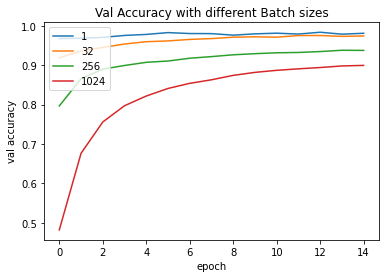

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with  batch size 1:', score[1]) 

score = model2.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with  batch size 32:', score[1]) 

score = model3.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with  batch size 256:', score[1]) 

score = model4.evaluate(X_test, Y_test, verbose=0)
print('\n''Test accuracy with  batch size 1024:', score[1])  


plt.plot(history1.history['val_accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.plot(history3.history['val_accuracy'])  
plt.plot(history4.history['val_accuracy']) 

plt.title('Val Accuracy with different Batch sizes')  
plt.ylabel('val accuracy')  
plt.xlabel('epoch')  
plt.legend(['1', '32','256','1024'], loc='upper left') 

Test & Validation Accuracies decrease with increase in batch size